# MEI Sequence Analysis

This notebook focuses on analysis pertaining to ACTUAL MEI sequences that were annotated by nBMST in each haplotype

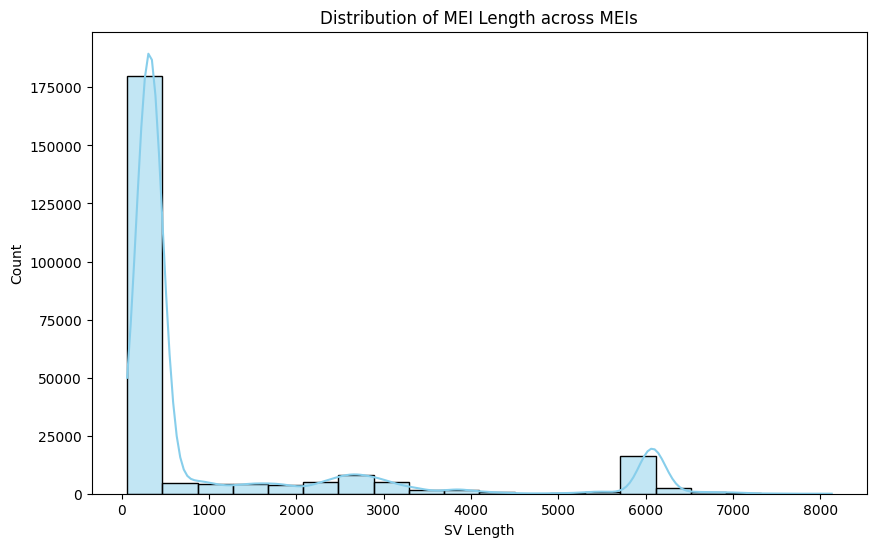

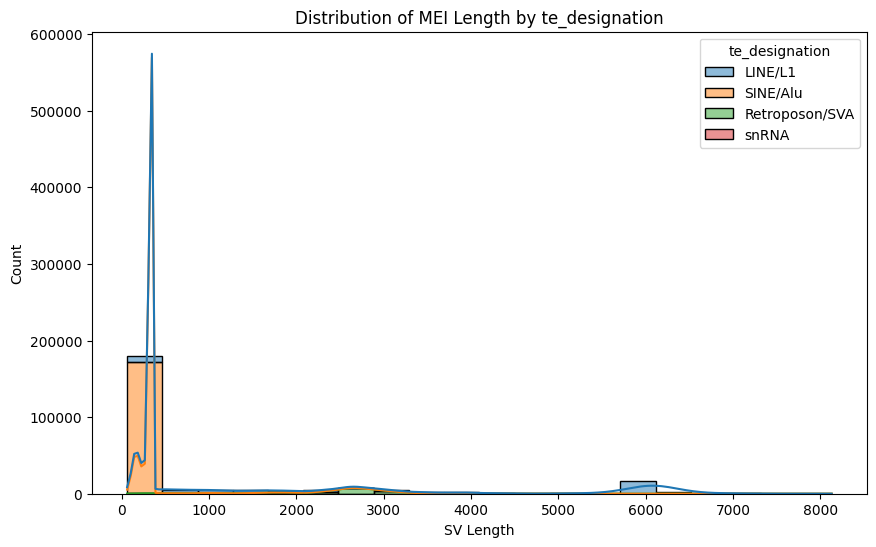

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")

# Extract the SV_Length from the l1me_aid_info column using the correct regex pattern
df['SV_Length'] = df['l1me_aid_info'].str.extract(r"Length:(\d+)")[0]

# Convert the extracted values to numeric, setting errors='coerce' will turn non-matches into NaN
df['SV_Length'] = pd.to_numeric(df['SV_Length'], errors='coerce')

# Option 1: Drop rows where SV_Length is NaN (if you don't want to include them in the plots)
df = df.dropna(subset=['SV_Length'])

# Option 2: Alternatively, you could fill NaN with a default value (e.g., 0) if that makes sense:
# df['SV_Length'] = df['SV_Length'].fillna(0)

# Convert SV_Length to integer now that NaNs have been handled
df['SV_Length'] = df['SV_Length'].astype(int)

# Plot overall length distribution of MEIs
plt.figure(figsize=(10, 6))
sns.histplot(df['SV_Length'], bins=20, kde=True, color="skyblue")
plt.xlabel("SV Length")
plt.ylabel("Count")
plt.title("Distribution of MEI Length across MEIs")
plt.show()

# Plot length distribution broken down by te_designation
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SV_Length', hue='te_designation', bins=20, kde=True, multiple='stack')
plt.xlabel("SV Length")
plt.ylabel("Count")
plt.title("Distribution of MEI Length by te_designation")
plt.show()

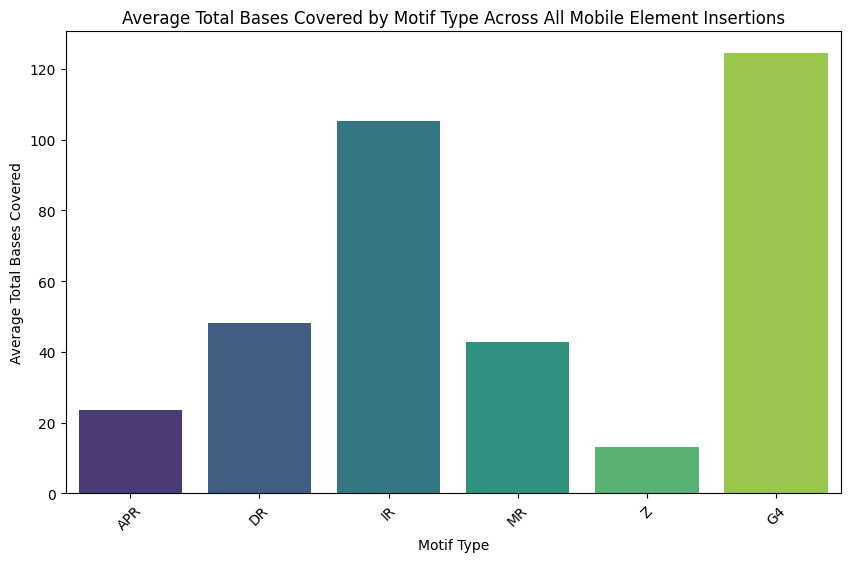

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the separate datasets
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")  # Update with correct path
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")  # Update with correct path

# 🔹 **Step 1: Group Non-B DNA by Sample & Motif Type, then sum "Total Bases Covered" per sample**
nonb_grouped = df_nonb.groupby(["Sample_Haplotype_Chromosome", "Motif Type"])["Total Bases Covered"].sum().reset_index()

# 🔹 **Step 2: Compute the average "Total Bases Covered" across all samples for each motif type**
motif_totals_nonb = nonb_grouped.groupby("Motif Type")["Total Bases Covered"].mean().reset_index()

# 🔹 **Step 3: Compute "Total Bases Covered" per Sample for G4s (Sum "L" for each Sample)**
g4_total_bases_per_sample = df_g4.groupby("Sample")["L"].sum()

# 🔹 **Step 4: Compute the average "Total Bases Covered" across all G4 samples**
average_g4_total_bases = g4_total_bases_per_sample.mean()

# 🔹 **Step 5: Create DataFrame for G4s**
motif_totals_g4 = pd.DataFrame({
    "Motif Type": ["G4"], 
    "Total Bases Covered": [average_g4_total_bases]
})

# 🔹 **Step 6: Concatenate Non-B DNA & G4s for Plotting**
motif_totals = pd.concat([motif_totals_nonb, motif_totals_g4], ignore_index=True)

# 🔥 **Step 7: Plot Both Datasets Together**
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=motif_totals, x="Motif Type", y="Total Bases Covered", hue="Motif Type", palette="viridis", dodge=False, legend=False)

plt.xlabel("Motif Type")
plt.ylabel("Average Total Bases Covered")
plt.title("Average Total Bases Covered by Motif Type Across All Mobile Element Insertions")

# 🔹 **Rotate x-axis labels if needed**
plt.xticks(rotation=45)

plt.show()

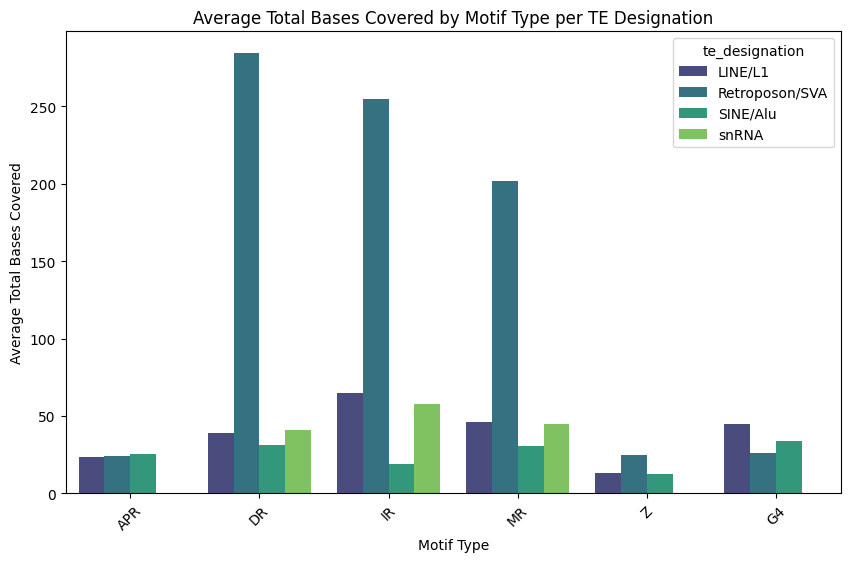

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the separate datasets
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")  # Update with correct path
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")  # Update with correct path

# 🔹 **Step 1: Group Non-B DNA by "Motif Type" & "te_designation"**
motif_te_totals_nonb = df_nonb.groupby(["Motif Type", "te_designation"])["Total Bases Covered"].mean().reset_index()

# 🔹 **Step 2: Group G4s by "te_designation" (Assign Motif Type = "G4")**
motif_te_totals_g4 = df_g4.groupby("te_designation")["L"].mean().reset_index()
motif_te_totals_g4["Motif Type"] = "G4"  # Manually assign G4 motif type

# Rename "L" (length) to "Total Bases Covered" for consistency
motif_te_totals_g4.rename(columns={"L": "Total Bases Covered"}, inplace=True)

# 🔹 **Step 3: Concatenate both datasets for plotting**
motif_te_totals = pd.concat([motif_te_totals_nonb, motif_te_totals_g4], ignore_index=True)

# 🔥 **Step 4: Create the bar plot**
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=motif_te_totals, 
                 x="Motif Type", 
                 y="Total Bases Covered", 
                 hue="te_designation", 
                 palette="viridis")

plt.xlabel("Motif Type")
plt.ylabel("Average Total Bases Covered")
plt.title("Average Total Bases Covered by Motif Type per TE Designation")

# 🔹 **Rotate x-axis labels if needed**
plt.xticks(rotation=45)

plt.show()

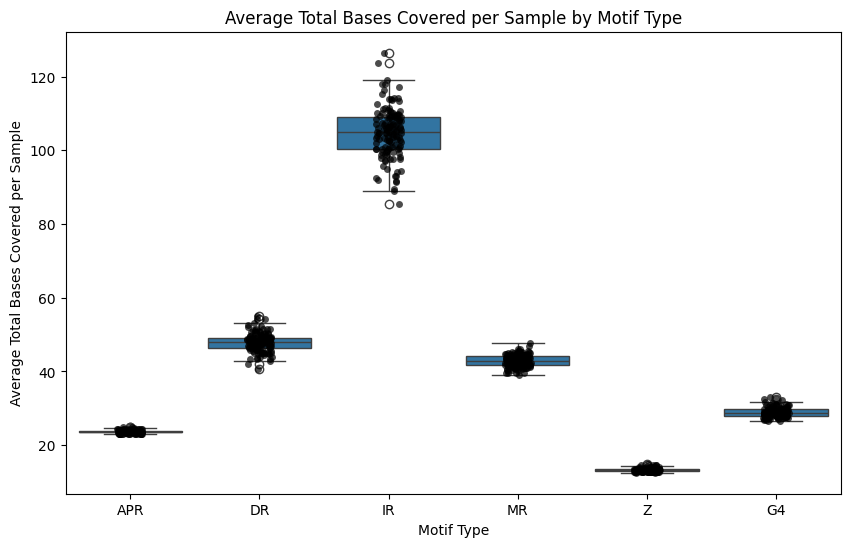

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the separate datasets
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")  # Update with correct path
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")  # Update with correct path

# 🔹 **Step 1: Extract "Sample" from Sample_Haplotype_Chromosome in Non-B DNA (everything before |)**
df_nonb['Sample'] = df_nonb['Sample_Haplotype_Chromosome'].str.split(r"\|").str[0]

# 🔹 **Step 2: Extract "Sample" from Sample column in G4s (everything before _)**
df_g4['Sample'] = df_g4['Sample'].str.split(r"_").str[0]

# 🔹 **Step 3: Compute the average "Total Bases Covered" per Sample & Motif Type for Non-B DNA**
sample_motif_avg_nonb = (
    df_nonb.groupby(['Sample', 'Motif Type'])['Total Bases Covered']
    .mean()
    .reset_index(name='avg_total_bases_covered')
)

# 🔹 **Step 4: Compute "Total Bases Covered" per Sample for G4s (sum "L")**
sample_motif_avg_g4 = (
    df_g4.groupby("Sample")["L"]
    .mean()
    .reset_index(name='avg_total_bases_covered')
)

# Assign "Motif Type" = "G4" for G4 entries
sample_motif_avg_g4["Motif Type"] = "G4"

# 🔹 **Step 5: Concatenate both datasets for plotting**
sample_motif_avg = pd.concat([sample_motif_avg_nonb, sample_motif_avg_g4], ignore_index=True)

# 🔥 **Step 6: Create the boxplot**
plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_motif_avg, x="Motif Type", y="avg_total_bases_covered")

# Overlay individual sample points
sns.stripplot(data=sample_motif_avg, x="Motif Type", y="avg_total_bases_covered", color='black', jitter=True, alpha=0.7)

plt.xlabel("Motif Type")
plt.ylabel("Average Total Bases Covered per Sample")
plt.title("Average Total Bases Covered per Sample by Motif Type")

plt.show()

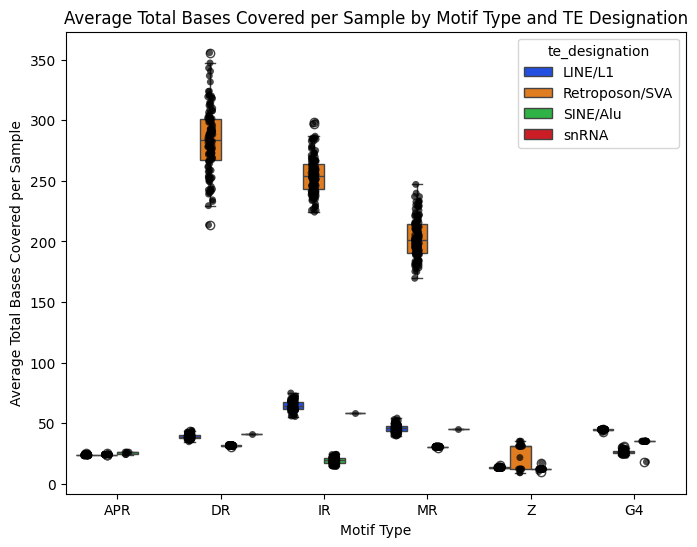

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the separate datasets
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")  # Update with correct path
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")  # Update with correct path

# 🔹 **Step 1: Extract "Sample" from Non-B DNA (before `|`)**
df_nonb['Sample'] = df_nonb['Sample_Haplotype_Chromosome'].str.split(r"\|").str[0]

# 🔹 **Step 2: Extract "Sample" from G4s (before `_`)**
df_g4['Sample'] = df_g4['Sample'].str.split(r"_").str[0]

# 🔹 **Step 3: Compute the average "Total Bases Covered" per Sample, Motif Type & TE for Non-B DNA**
sample_motif_te_avg_nonb = (
    df_nonb.groupby(['Sample', 'Motif Type', 'te_designation'])['Total Bases Covered']
    .mean()
    .reset_index(name='avg_total_bases_covered')
)

# 🔹 **Step 4: Compute "Total Bases Covered" per Sample & TE Designation for G4s (sum "L")**
sample_motif_te_avg_g4 = (
    df_g4.groupby(['Sample', 'te_designation'])["L"]
    .mean()
    .reset_index(name='avg_total_bases_covered')
)

# Assign "Motif Type" = "G4" for G4 entries
sample_motif_te_avg_g4["Motif Type"] = "G4"

# 🔹 **Step 5: Concatenate both datasets for plotting**
sample_motif_te_avg = pd.concat([sample_motif_te_avg_nonb, sample_motif_te_avg_g4], ignore_index=True)

# 🔥 **Step 6: Set up the figure**
plt.figure(figsize=(8, 6))

# Create the boxplot stratified by TE designation
ax = sns.boxplot(
    data=sample_motif_te_avg, 
    x="Motif Type", 
    y="avg_total_bases_covered", 
    hue="te_designation", 
    palette="bright"
)

# Create a custom palette mapping each te_designation to black for the overlay points
te_categories = sample_motif_te_avg['te_designation'].unique()
black_palette = {cat: "black" for cat in te_categories}

# Overlay the individual sample points using the custom black palette
sns.stripplot(
    data=sample_motif_te_avg, 
    x="Motif Type", 
    y="avg_total_bases_covered", 
    hue="te_designation", 
    dodge=True, 
    marker='o', 
    alpha=0.7, 
    palette=black_palette
)

# Remove duplicate legend entries (keep only one legend for te_designation)
handles, labels = ax.get_legend_handles_labels()
n = len(handles) // 2
ax.legend(handles[:n], labels[:n], title="te_designation")

plt.xlabel("Motif Type")
plt.ylabel("Average Total Bases Covered per Sample")
plt.title("Average Total Bases Covered per Sample by Motif Type and TE Designation")

plt.show()

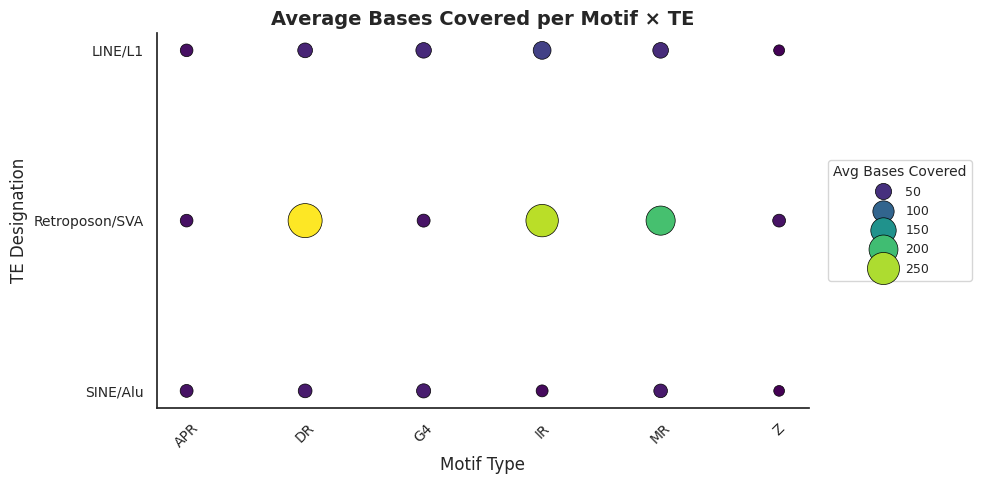

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load your data ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Extract Sample identifiers ===
df_nonb['Sample'] = df_nonb['Sample_Haplotype_Chromosome'].str.split(r"\|").str[0]
df_g4['Sample'] = df_g4['Sample'].str.split(r"_").str[0]

# === Compute mean "Total Bases Covered" per Sample, Motif, TE ===
sample_motif_te_avg_nonb = (
    df_nonb.groupby(['Sample', 'Motif Type', 'te_designation'])['Total Bases Covered']
    .mean()
    .reset_index(name='avg_total_bases_covered')
)

sample_motif_te_avg_g4 = (
    df_g4.groupby(['Sample', 'te_designation'])["L"]
    .mean()
    .reset_index(name='avg_total_bases_covered')
)
sample_motif_te_avg_g4["Motif Type"] = "G4"

# === Combine datasets ===
sample_motif_te_avg = pd.concat([sample_motif_te_avg_nonb, sample_motif_te_avg_g4], ignore_index=True)

# === 🔥 REMOVE snRNA ===
sample_motif_te_avg = sample_motif_te_avg[sample_motif_te_avg["te_designation"] != "snRNA"]

# === Group by Motif Type + TE Designation ===
heatmap_data = (
    sample_motif_te_avg
    .groupby(['te_designation', 'Motif Type'])['avg_total_bases_covered']
    .mean()
    .reset_index()
)

# === Plot setup ===
sns.set(style="white")
plt.figure(figsize=(10, 5))

bubble = sns.scatterplot(
    data=heatmap_data,
    x="Motif Type",
    y="te_designation",
    size="avg_total_bases_covered",
    hue="avg_total_bases_covered",
    palette="viridis",
    sizes=(60, 600),
    legend="brief",
    edgecolor="black",
    linewidth=0.5
)

# === Titles and axes ===
plt.title("Average Bases Covered per Motif × TE", fontsize=14, weight='bold')
plt.xlabel("Motif Type", fontsize=12)
plt.ylabel("TE Designation", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# === Remove gridlines ===
sns.despine()
bubble.grid(False)

# === Move legend to the right ===
handles, labels = bubble.get_legend_handles_labels()
bubble.legend(
    title="Avg Bases Covered",
    fontsize=9,
    title_fontsize=10,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.5
)

plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# === Load Non-B dataset ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")

# === Extract haplotype/sample ===
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]

# === Filter to Retroposon/SVA and IR/MR/DR motifs ===
motifs_of_interest = ["IR", "MR", "DR"]
df_sva = df_nonb[
    (df_nonb["te_designation"] == "Retroposon/SVA") &
    (df_nonb["Motif Type"].isin(motifs_of_interest))
].copy()

# === Summarize MEIs: haplotype count and total base coverage ===
mei_summary = (
    df_sva.groupby("identifier")
    .agg(
        haplotype_count=("Sample", "nunique"),
        total_coverage=("Total Bases Covered", "sum")
    )
    .reset_index()
    .sort_values(["haplotype_count", "total_coverage"], ascending=[False, False])
)

# === Identify top MEI
top_mei_id = mei_summary.iloc[0]["identifier"]
print(f"\nTop Retroposon/SVA MEI: {top_mei_id}")

# === Subset to top MEI
df_top_mei = df_sva[df_sva["identifier"] == top_mei_id].copy()

# === General stats
n_haplotypes = df_top_mei["Sample"].nunique()
n_total_motifs = df_top_mei.shape[0]
total_coverage = df_top_mei["Total Bases Covered"].sum()
motif_list = sorted(df_top_mei["Motif Type"].unique())

print(f"- Total haplotypes: {n_haplotypes}")
print(f"- Total motif calls: {n_total_motifs}")
print(f"- Total base coverage: {total_coverage}")
print(f"- Motif types present: {', '.join(motif_list)}")

# === Motif-specific stats with avg per haplotype
motif_stats = (
    df_top_mei.groupby("Motif Type")
    .agg(
        haplotype_count=("Sample", "nunique"),
        total_motifs=("Sample", "count"),
        total_coverage=("Total Bases Covered", "sum")
    )
    .assign(avg_coverage_per_haplotype=lambda d: d["total_coverage"] / d["haplotype_count"])
    .reset_index()
    .sort_values("haplotype_count", ascending=False)
)

print("\nMotif-wise Breakdown (with avg base coverage per haplotype):")
print(motif_stats[["Motif Type", "haplotype_count", "total_motifs", "avg_coverage_per_haplotype"]].to_string(index=False, float_format="%.2f"))


Top Retroposon/SVA MEI: chr14_99355095_2927_INS
- Total haplotypes: 114
- Total motif calls: 342
- Total base coverage: 62130
- Motif types present: DR, IR, MR

Motif-wise Breakdown (with avg base coverage per haplotype):
Motif Type  haplotype_count  total_motifs  avg_coverage_per_haplotype
        DR              114           114                      123.00
        IR              114           114                      172.00
        MR              114           114                      250.00


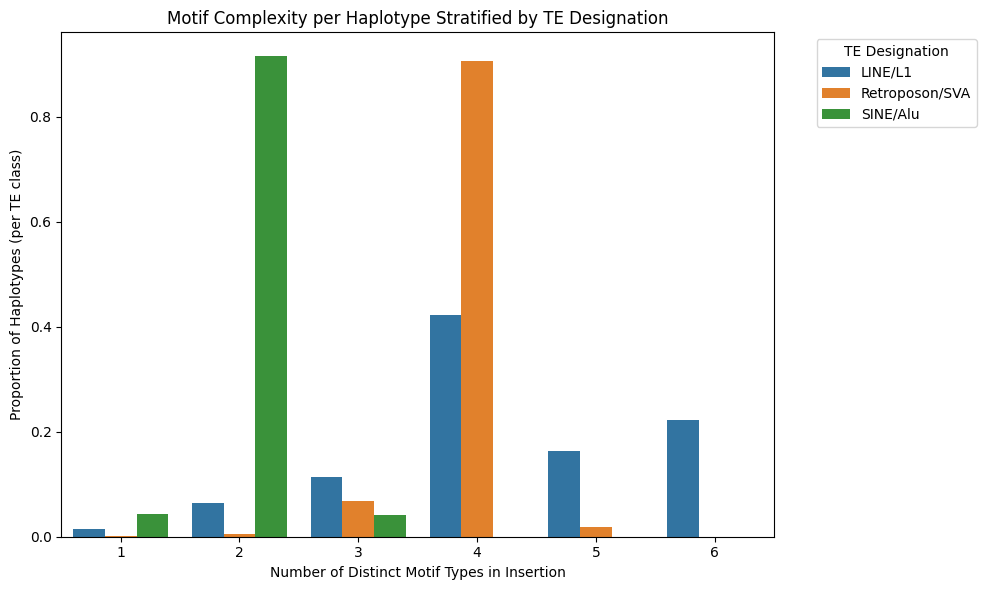


Most common SINGLE motif types:
  Count  count
0    MR   2450
1    IR   1101
2    DR    391
3    G4     51

Most common MULTI motif combinations:
                Count  count
0               DR,MR  78915
1         DR,G4,IR,MR  10989
2            DR,IR,MR   4483
3   APR,DR,G4,IR,MR,Z   3222
4     APR,DR,G4,IR,MR   2308
5               G4,IR    907
6         APR,G4,IR,Z    847
7            G4,IR,MR    641
8           APR,G4,IR    265
9            DR,G4,IR    196
10       APR,DR,G4,IR    108
11     APR,G4,IR,MR,Z    106
12       APR,G4,IR,MR     72
13              IR,MR     57
14      DR,G4,IR,MR,Z     57
15            G4,IR,Z     36
16           DR,G4,MR     35
17               MR,Z     35
18     APR,DR,IR,MR,Z     17
19          APR,DR,MR      6
20            DR,MR,Z      2
21       APR,DR,IR,MR      1


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load data ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Extract haplotype/sample
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]

# === Standardize G4 format
df_g4["Motif Type"] = "G4"
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine all motifs
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()

# === Filter out snRNA
df = df[df["te_designation"] != "snRNA"]

# === Build motif count per (MEI, haplotype)
motif_counts = (
    df.groupby(["identifier", "Sample"])
    .agg(
        motif_type_count=("Motif Type", "nunique"),
        te_designation=("te_designation", lambda x: x.iloc[0])  # assume unique TE per MEI
    )
    .reset_index()
)

# === Group for normalized barplot (motif count per TE class)
count_table = (
    motif_counts.groupby(["te_designation", "motif_type_count"])
    .size()
    .reset_index(name="Num_Haplotypes")
)

# Normalize per TE
total_per_te = count_table.groupby("te_designation")["Num_Haplotypes"].transform("sum")
count_table["Proportion"] = count_table["Num_Haplotypes"] / total_per_te

# === PLOT: normalized motif complexity per TE
plt.figure(figsize=(10, 6))
sns.barplot(data=count_table, x="motif_type_count", y="Proportion", hue="te_designation")
plt.title("Motif Complexity per Haplotype Stratified by TE Designation")
plt.xlabel("Number of Distinct Motif Types in Insertion")
plt.ylabel("Proportion of Haplotypes (per TE class)")
plt.legend(title="TE Designation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === ANALYSIS: Most common SINGLE motif types
single_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() == 1
)
single_motif_types = (
    single_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .first()
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Type", "Motif Type": "Count"})
)
print("\nMost common SINGLE motif types:")
print(single_motif_types)

# === ANALYSIS: Most common MULTI motif combinations
multi_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() > 1
)
multi_motif_combo = (
    multi_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .apply(lambda x: ",".join(sorted(set(x))))
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Combo", "Motif Type": "Count"})
)
print("\nMost common MULTI motif combinations:")
print(multi_motif_combo)

Total unique MEIs: 11277


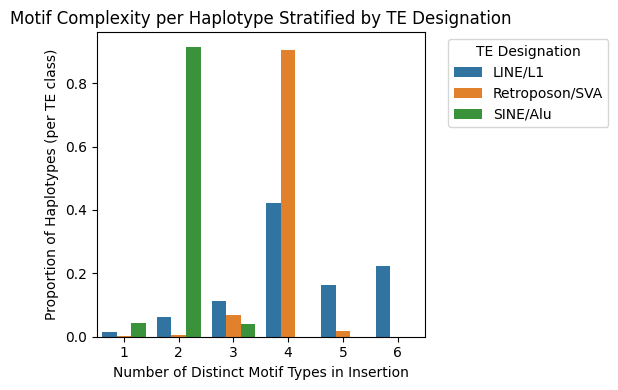


Most common SINGLE motif types:
  Count  count
0    MR   2450
1    IR   1101
2    DR    391
3    G4     51

Most common MULTI motif combinations:
                Count  count
0               DR,MR  78915
1         DR,G4,IR,MR  10989
2            DR,IR,MR   4483
3   APR,DR,G4,IR,MR,Z   3222
4     APR,DR,G4,IR,MR   2308
5               G4,IR    907
6         APR,G4,IR,Z    847
7            G4,IR,MR    641
8           APR,G4,IR    265
9            DR,G4,IR    196
10       APR,DR,G4,IR    108
11     APR,G4,IR,MR,Z    106
12       APR,G4,IR,MR     72
13              IR,MR     57
14      DR,G4,IR,MR,Z     57
15            G4,IR,Z     36
16           DR,G4,MR     35
17               MR,Z     35
18     APR,DR,IR,MR,Z     17
19          APR,DR,MR      6
20            DR,MR,Z      2
21       APR,DR,IR,MR      1


<Figure size 1000x1000 with 0 Axes>

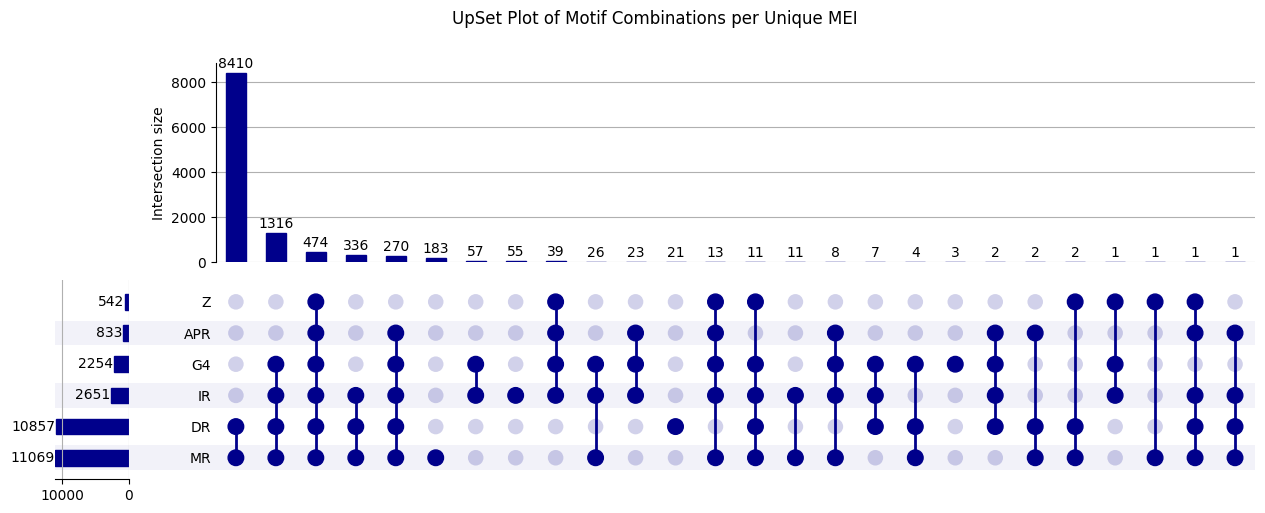

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet, from_memberships

# === Load data ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Extract haplotype/sample
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]

# === Standardize G4 format
df_g4["Motif Type"] = "G4"
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine all motifs
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()

# === Filter out snRNA
df = df[df["te_designation"] != "snRNA"]

total_meis = df["identifier"].nunique()
print("Total unique MEIs:", total_meis)

# === Build motif count per (MEI, haplotype)
motif_counts = (
    df.groupby(["identifier", "Sample"])
    .agg(
        motif_type_count=("Motif Type", "nunique"),
        te_designation=("te_designation", lambda x: x.iloc[0])  # assume unique TE per MEI
    )
    .reset_index()
)

# === Group for normalized barplot (motif count per TE class)
count_table = (
    motif_counts.groupby(["te_designation", "motif_type_count"])
    .size()
    .reset_index(name="Num_Haplotypes")
)

# Normalize per TE
total_per_te = count_table.groupby("te_designation")["Num_Haplotypes"].transform("sum")
count_table["Proportion"] = count_table["Num_Haplotypes"] / total_per_te

# === PLOT: normalized motif complexity per TE
plt.figure(figsize=(6, 4))
sns.barplot(data=count_table, x="motif_type_count", y="Proportion", hue="te_designation")
plt.title("Motif Complexity per Haplotype Stratified by TE Designation")
plt.xlabel("Number of Distinct Motif Types in Insertion")
plt.ylabel("Proportion of Haplotypes (per TE class)")
plt.legend(title="TE Designation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === ANALYSIS: Most common SINGLE motif types
single_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() == 1
)
single_motif_types = (
    single_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .first()
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Type", "Motif Type": "Count"})
)
print("\nMost common SINGLE motif types:")
print(single_motif_types)

# === ANALYSIS: Most common MULTI motif combinations
multi_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() > 1
)
multi_motif_combo = (
    multi_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .apply(lambda x: ",".join(sorted(set(x))))
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Combo", "Motif Type": "Count"})
)
print("\nMost common MULTI motif combinations:")
print(multi_motif_combo)

# === FIXED: UpSet showing motif combinations per unique MEI (ignoring haplotypes)
# Group only by MEI identifier (not sample)
combo_df = (
    df.groupby("identifier")["Motif Type"]
    .apply(lambda x: sorted(set(x)))
    .reset_index(name="Motif Set")
)

# Count how many MEIs have each unique motif set
combo_counts = combo_df["Motif Set"].value_counts()

# Create UpSet input: one entry per MEI motif set
upset_input = from_memberships(combo_counts.index.tolist(), data=combo_counts.values)

# Plot
plt.figure(figsize=(10, 10))
UpSet(upset_input, sort_by='cardinality', show_counts=True, facecolor="darkblue").plot()
plt.suptitle("UpSet Plot of Motif Combinations per Unique MEI")
plt.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.1)
plt.show()

Total unique MEIs: 11277


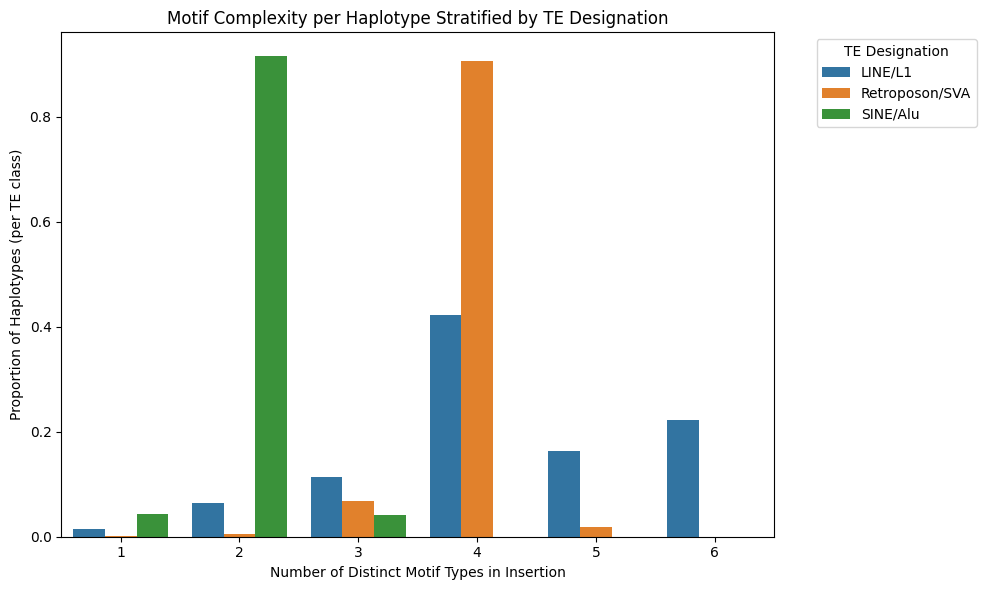


Most common SINGLE motif types:
  Count  count
0    MR   2450
1    IR   1101
2    DR    391
3    G4     51

Most common MULTI motif combinations:
                Count  count
0               DR,MR  78915
1         DR,G4,IR,MR  10989
2            DR,IR,MR   4483
3   APR,DR,G4,IR,MR,Z   3222
4     APR,DR,G4,IR,MR   2308
5               G4,IR    907
6         APR,G4,IR,Z    847
7            G4,IR,MR    641
8           APR,G4,IR    265
9            DR,G4,IR    196
10       APR,DR,G4,IR    108
11     APR,G4,IR,MR,Z    106
12       APR,G4,IR,MR     72
13              IR,MR     57
14      DR,G4,IR,MR,Z     57
15            G4,IR,Z     36
16           DR,G4,MR     35
17               MR,Z     35
18     APR,DR,IR,MR,Z     17
19          APR,DR,MR      6
20            DR,MR,Z      2
21       APR,DR,IR,MR      1


<Figure size 1200x600 with 0 Axes>

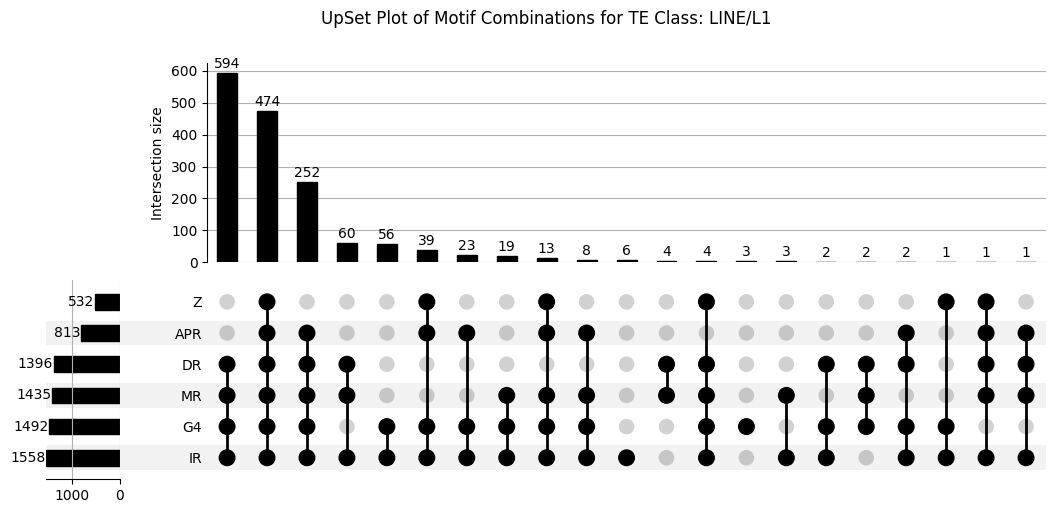

<Figure size 1200x600 with 0 Axes>

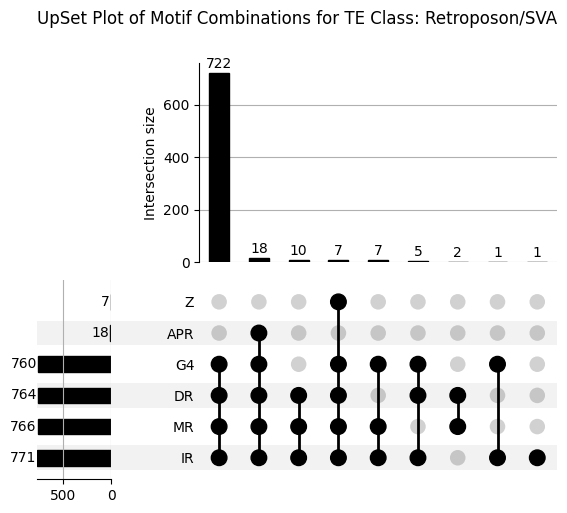

<Figure size 1200x600 with 0 Axes>

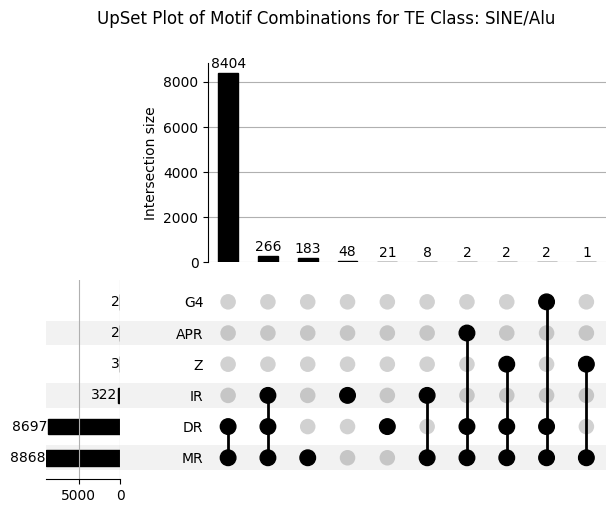

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet, from_memberships

# === Load data ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Extract haplotype/sample
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]

# === Standardize G4 format
df_g4["Motif Type"] = "G4"
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine all motifs
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()

# === Filter out snRNA
df = df[df["te_designation"] != "snRNA"]

total_meis = df["identifier"].nunique()
print("Total unique MEIs:", total_meis)

# === Build motif count per (MEI, haplotype)
motif_counts = (
    df.groupby(["identifier", "Sample"])
    .agg(
        motif_type_count=("Motif Type", "nunique"),
        te_designation=("te_designation", lambda x: x.iloc[0])  # assume unique TE per MEI
    )
    .reset_index()
)

# === Group for normalized barplot (motif count per TE class)
count_table = (
    motif_counts.groupby(["te_designation", "motif_type_count"])
    .size()
    .reset_index(name="Num_Haplotypes")
)

# Normalize per TE
total_per_te = count_table.groupby("te_designation")["Num_Haplotypes"].transform("sum")
count_table["Proportion"] = count_table["Num_Haplotypes"] / total_per_te

# === PLOT: normalized motif complexity per TE
plt.figure(figsize=(10, 6))
sns.barplot(data=count_table, x="motif_type_count", y="Proportion", hue="te_designation")
plt.title("Motif Complexity per Haplotype Stratified by TE Designation")
plt.xlabel("Number of Distinct Motif Types in Insertion")
plt.ylabel("Proportion of Haplotypes (per TE class)")
plt.legend(title="TE Designation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === ANALYSIS: Most common SINGLE motif types
single_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() == 1
)
single_motif_types = (
    single_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .first()
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Type", "Motif Type": "Count"})
)
print("\nMost common SINGLE motif types:")
print(single_motif_types)

# === ANALYSIS: Most common MULTI motif combinations
multi_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() > 1
)
multi_motif_combo = (
    multi_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .apply(lambda x: ",".join(sorted(set(x))))
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Combo", "Motif Type": "Count"})
)
print("\nMost common MULTI motif combinations:")
print(multi_motif_combo)

# === STEP: Assign one TE designation per MEI
te_map = df.groupby("identifier")["te_designation"].first().to_dict()
df["TE_Class"] = df["identifier"].map(te_map)

# === STEP: Group motif combinations per unique MEI, WITH TE info
combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("TE_Class", "first")
    )
    .reset_index()
)

# === STEP: Create one UpSet plot per TE class
unique_tes = combo_df["TE_Class"].unique()

for te in sorted(unique_tes):
    subset = combo_df[combo_df["TE_Class"] == te]
    if subset.empty:
        continue
    combo_counts = subset["Motif_Set"].value_counts()
    upset_input = from_memberships(combo_counts.index.tolist(), data=combo_counts.values)
    
    plt.figure(figsize=(12, 6))
    UpSet(upset_input, sort_by='cardinality', show_counts=True).plot()
    plt.suptitle(f"UpSet Plot of Motif Combinations for TE Class: {te}")
    plt.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.1)
    plt.show()

Total unique MEIs: 11277


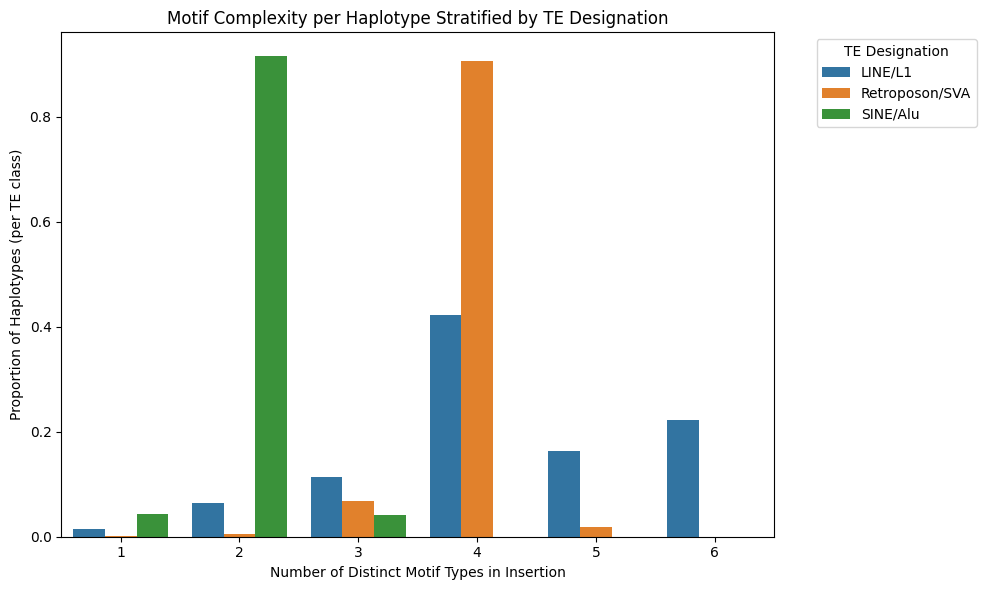


Most common SINGLE motif types:
  Count  count
0    MR   2450
1    IR   1101
2    DR    391
3    G4     51

Most common MULTI motif combinations:
                Count  count
0               DR,MR  78915
1         DR,G4,IR,MR  10989
2            DR,IR,MR   4483
3   APR,DR,G4,IR,MR,Z   3222
4     APR,DR,G4,IR,MR   2308
5               G4,IR    907
6         APR,G4,IR,Z    847
7            G4,IR,MR    641
8           APR,G4,IR    265
9            DR,G4,IR    196
10       APR,DR,G4,IR    108
11     APR,G4,IR,MR,Z    106
12       APR,G4,IR,MR     72
13              IR,MR     57
14      DR,G4,IR,MR,Z     57
15            G4,IR,Z     36
16           DR,G4,MR     35
17               MR,Z     35
18     APR,DR,IR,MR,Z     17
19          APR,DR,MR      6
20            DR,MR,Z      2
21       APR,DR,IR,MR      1


<Figure size 1000x600 with 0 Axes>

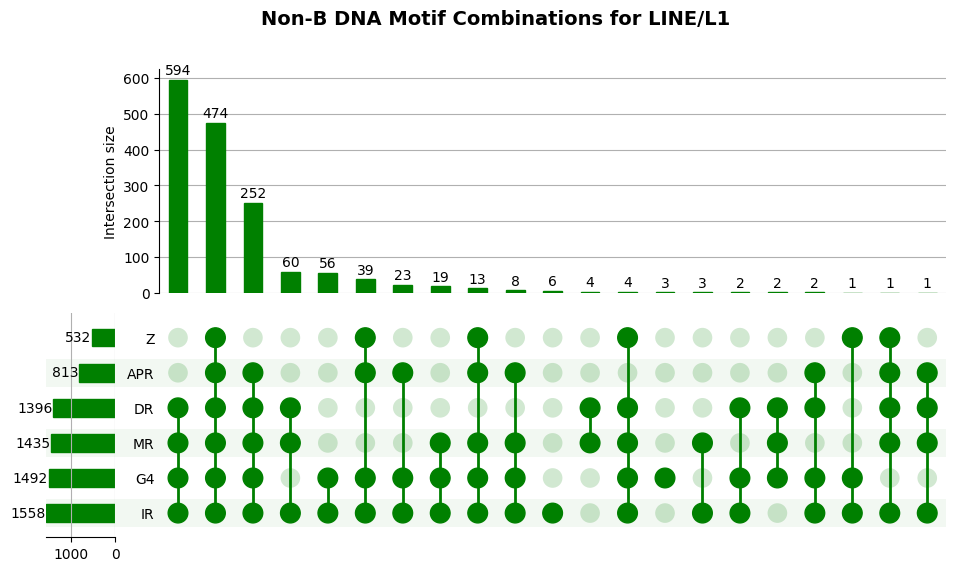

<Figure size 1000x600 with 0 Axes>

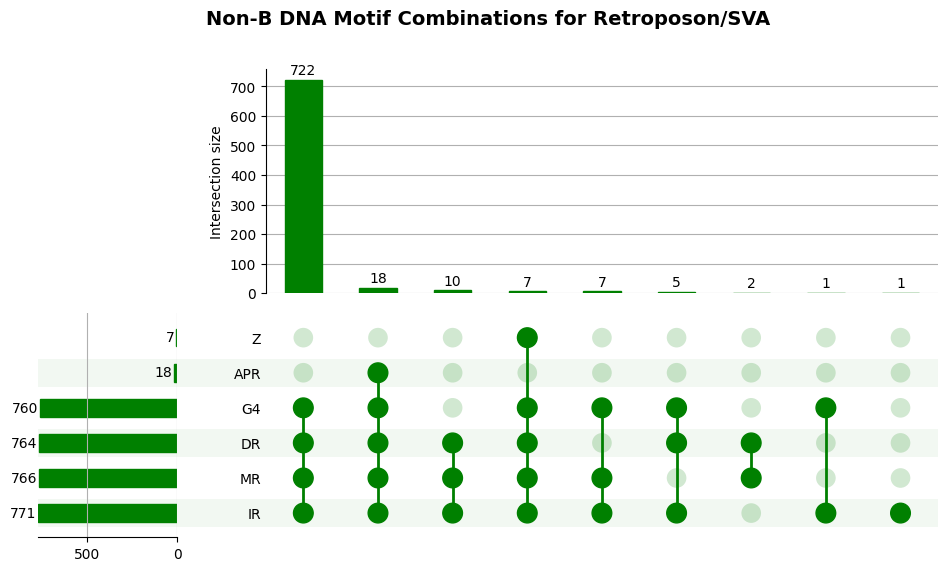

<Figure size 1000x600 with 0 Axes>

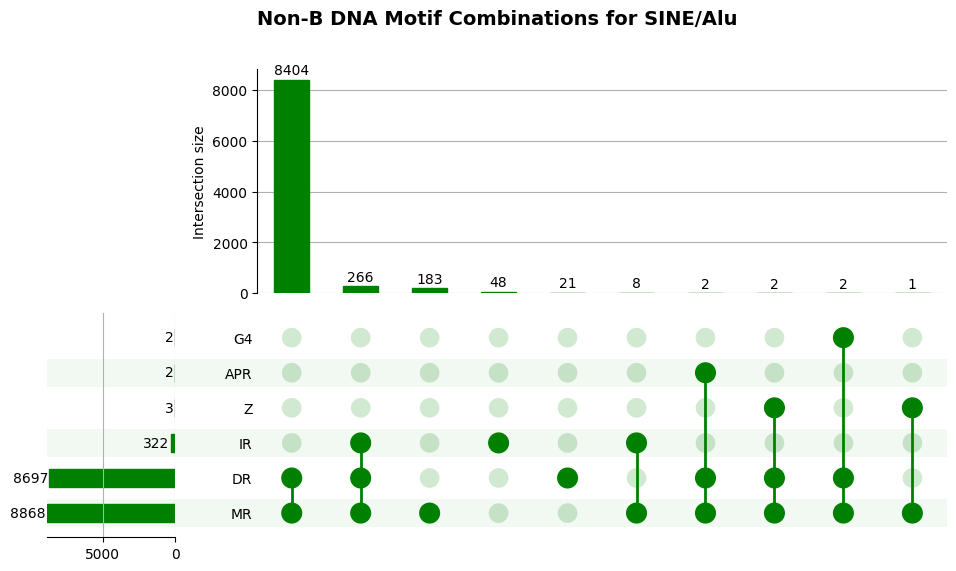

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet, from_memberships
import warnings

# === Suppress future warnings from pandas/upsetplot ===
warnings.filterwarnings("ignore", category=FutureWarning)

# === Load data ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Standardize sample and motif columns ===
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]
df_g4["Motif Type"] = "G4"

df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine, deduplicate, and filter ===
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]

print("Total unique MEIs:", df["identifier"].nunique())

# === Count motif types per MEI+sample ===
motif_counts = (
    df.groupby(["identifier", "Sample"])
    .agg(
        motif_type_count=("Motif Type", "nunique"),
        te_designation=("te_designation", lambda x: x.iloc[0])
    )
    .reset_index()
)

# === Barplot: Motif complexity per TE class ===
count_table = (
    motif_counts.groupby(["te_designation", "motif_type_count"])
    .size()
    .reset_index(name="Num_Haplotypes")
)

# Normalize per TE
total_per_te = count_table.groupby("te_designation")["Num_Haplotypes"].transform("sum")
count_table["Proportion"] = count_table["Num_Haplotypes"] / total_per_te

plt.figure(figsize=(10, 6))
sns.barplot(data=count_table, x="motif_type_count", y="Proportion", hue="te_designation")
plt.title("Motif Complexity per Haplotype Stratified by TE Designation")
plt.xlabel("Number of Distinct Motif Types in Insertion")
plt.ylabel("Proportion of Haplotypes (per TE class)")
plt.legend(title="TE Designation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# === Most common SINGLE motif types ===
single_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() == 1
)
single_motif_types = (
    single_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .first()
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Type", "Motif Type": "Count"})
)
print("\nMost common SINGLE motif types:")
print(single_motif_types)

# === Most common MULTI motif combinations ===
multi_motif = df.groupby(["identifier", "Sample"]).filter(
    lambda x: x["Motif Type"].nunique() > 1
)
multi_motif_combo = (
    multi_motif.groupby(["identifier", "Sample"])["Motif Type"]
    .apply(lambda x: ",".join(sorted(set(x))))
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Motif Combo", "Motif Type": "Count"})
)
print("\nMost common MULTI motif combinations:")
print(multi_motif_combo)

# === Assign TE class to each MEI ===
te_map = df.groupby("identifier")["te_designation"].first().to_dict()
df["TE_Class"] = df["identifier"].map(te_map)

# === Build motif set per MEI ===
combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("TE_Class", "first")
    )
    .reset_index()
)

# === Color map per TE class ===
te_colors = {
    "L1": "royalblue",
    "Alu": "seagreen",
    "SVA": "darkorange",
    "ERV": "crimson",
    "HERV": "mediumorchid"
}

# === UpSet plot per TE class (inline, no saving) ===
for te in sorted(combo_df["TE_Class"].unique()):
    subset = combo_df[combo_df["TE_Class"] == te]
    if subset.empty:
        continue

    combo_counts = subset["Motif_Set"].value_counts()
    upset_input = from_memberships(combo_counts.index.tolist(), data=combo_counts.values)

    fig = plt.figure(figsize=(10, 6))
    upset = UpSet(
        upset_input,
        sort_by='cardinality',
        show_counts=True,
        element_size=None,
        facecolor=te_colors.get(te, 'green')
    )
    upset.plot()
    plt.suptitle(f"Non-B DNA Motif Combinations for {te}", fontsize=14, weight='bold')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.1)
    plt.show()

Total matching MEIs: 8404

Counts by chromosome:
chrom
chr1     692
chr10    376
chr11    387
chr12    411
chr13    338
chr14    300
chr15    274
chr16    186
chr17    213
chr18    257
chr19    137
chr2     716
chr20    169
chr21    128
chr22    109
chr3     634
chr4     606
chr5     561
chr6     572
chr7     524
chr8     449
chr9     365
Name: count, dtype: int64


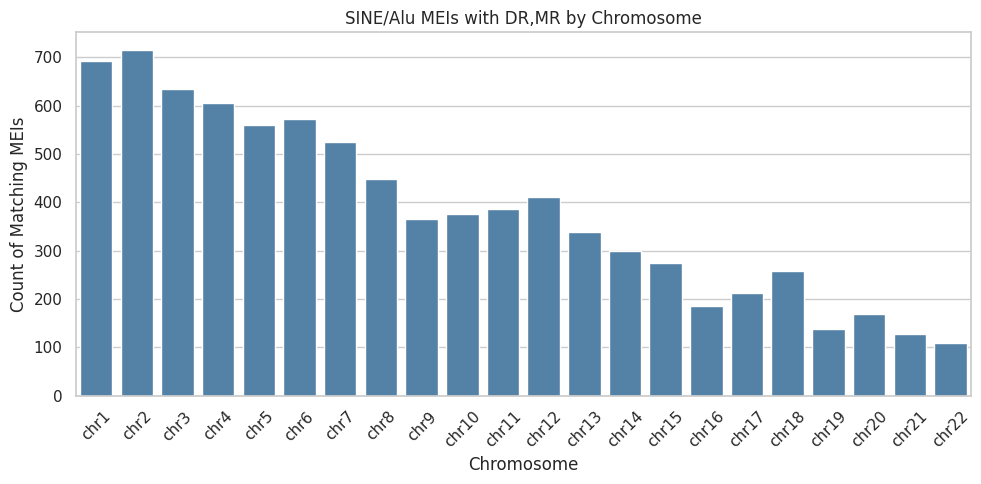

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load input data
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Standardize & extract Sample
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]
df_g4["Motif Type"] = "G4"

# === Select relevant columns
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine and deduplicate
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]

# === Extract full chromosome name (e.g., chr1, chrX)
df["chrom"] = df["identifier"].str.extract(r"^(chr[0-9XYM]+)_")[0]

# === Build motif set per MEI
combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("te_designation", "first"),
        chrom=("chrom", "first")
    )
    .reset_index()
)
combo_df["Motif_Combo"] = combo_df["Motif_Set"].apply(lambda x: ",".join(x))

# === Filter for SINE/Alu with DR,MR combo
filtered = combo_df[
    (combo_df["TE_Class"] == "SINE/Alu") &
    (combo_df["Motif_Combo"] == "DR,MR")
]

# === Summary: count per chromosome
print("Total matching MEIs:", len(filtered))
print("\nCounts by chromosome:")
print(filtered["chrom"].value_counts().sort_index())

# === Safe chromosome sorting function
def chrom_sort_key(chrom):
    base = chrom.replace("chr", "")
    if base.isdigit():
        return int(base)
    elif base == "X":
        return 23
    elif base == "Y":
        return 24
    else:
        return 100  # non-standard chromosomes like chrM, chrUn, etc.

# === PLOT: MEI count by chromosome in proper order
chrom_counts = filtered["chrom"].value_counts().reset_index()
chrom_counts.columns = ["chrom", "count"]
chrom_counts = chrom_counts.sort_values(by="chrom", key=lambda col: col.map(chrom_sort_key))

plt.figure(figsize=(10, 5))
sns.barplot(data=chrom_counts, x="chrom", y="count", color="steelblue")
plt.title("SINE/Alu MEIs with DR,MR by Chromosome")
plt.xlabel("Chromosome")
plt.ylabel("Count of Matching MEIs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# === Load input data
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Standardize & extract Sample
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]
df_g4["Motif Type"] = "G4"

# === Select relevant columns
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine and deduplicate
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]

# === Extract full chromosome name (e.g., chr1, chrX)
df["chrom"] = df["identifier"].str.extract(r"^(chr[0-9XYM]+)_")[0]

# === Build motif set per MEI
combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("te_designation", "first"),
        chrom=("chrom", "first")
    )
    .reset_index()
)
combo_df["Motif_Combo"] = combo_df["Motif_Set"].apply(lambda x: ",".join(x))

# === Find Retroposon/SVA insertions with ONLY IR motif
ir_only = combo_df[
    (combo_df["TE_Class"] == "Retroposon/SVA") &
    (combo_df["Motif_Combo"] == "IR")
]

# === Print result
print("=== Retroposon/SVA insertions with ONLY IR motif ===")
print(ir_only)

if ir_only.empty:
    print("\nNo Retroposon/SVA insertions found with only IR.")
else:
    # Print the identifier for follow-up
    target_id = ir_only.iloc[0]["identifier"]
    print("\nIdentifier of interest:", target_id)

    # Find associated sample(s)
    sample_match = df[df["identifier"] == target_id]["Sample"].unique()
    print("Associated sample(s):", sample_match)

    # Print full entries from original df for context
    print("\nDetailed motif entries for this identifier:")
    print(df[df["identifier"] == target_id])

=== Retroposon/SVA insertions with ONLY IR motif ===
                  identifier Motif_Set        TE_Class chrom Motif_Combo
6605  chr3_162953833_372_INS      [IR]  Retroposon/SVA  chr3          IR

Identifier of interest: chr3_162953833_372_INS
Associated sample(s): ['HG02953.h2.MEI' 'HG02554.h2.MEI' 'HG01890.h2.MEI' 'HG02282.h2.MEI'
 'HG03065.h2.MEI' 'HG02587.h2.MEI' 'NA21487.h2.MEI' 'NA19238.h1.MEI'
 'NA19036.h2.MEI' 'HG02554.h1.MEI' 'HG03456.h2.MEI']

Detailed motif entries for this identifier:
                    identifier Motif Type          Sample  te_designation  \
31146   chr3_162953833_372_INS         IR  HG02953.h2.MEI  Retroposon/SVA   
94704   chr3_162953833_372_INS         IR  HG02554.h2.MEI  Retroposon/SVA   
107919  chr3_162953833_372_INS         IR  HG01890.h2.MEI  Retroposon/SVA   
124431  chr3_162953833_372_INS         IR  HG02282.h2.MEI  Retroposon/SVA   
130649  chr3_162953833_372_INS         IR  HG03065.h2.MEI  Retroposon/SVA   
138525  chr3_162953833_372_INS   

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load input data
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# === Standardize & extract Sample
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]
df_g4["Motif Type"] = "G4"

# === Select relevant columns
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]

# === Combine and deduplicate
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]

# === Extract full chromosome name (e.g., chr1, chrX)
df["chrom"] = df["identifier"].str.extract(r"^(chr[0-9XYM]+)_")[0]

# === Build motif set per MEI
combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("te_designation", "first"),
        chrom=("chrom", "first")
    )
    .reset_index()
)
combo_df["Motif_Combo"] = combo_df["Motif_Set"].apply(lambda x: ",".join(x))

# === Filter for SINE/Alu with DR,MR combo
filtered = combo_df[
    (combo_df["TE_Class"] == "SINE/Alu") &
    (combo_df["Motif_Combo"] == "DR,MR")
]

filtered.head(10)

,identifier,Motif_Set,TE_Class,chrom,Motif_Combo
0,chr10_100157359_332_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
1,chr10_100876072_324_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
2,chr10_10104450_328_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
7,chr10_102771352_306_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
10,chr10_102885606_328_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
11,chr10_103177105_317_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
12,chr10_103377346_174_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
14,chr10_104145043_187_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
16,chr10_104471084_266_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"
17,chr10_10462178_323_INS,"[DR, MR]",SINE/Alu,chr10,"DR,MR"


✅ Loaded motif midpoint data: (16850, 2)


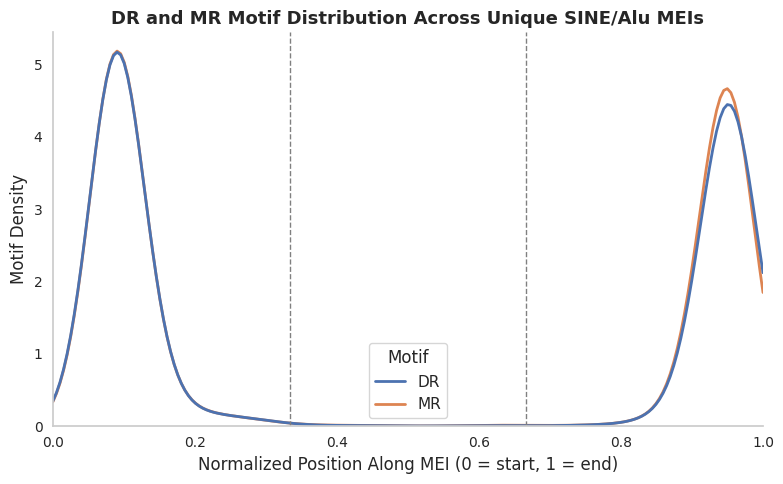

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set(style="whitegrid")

# === Step 1: Load and filter MEIs with only DR and MR ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4 = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# Extract Sample info and standardize
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4["Sample"] = df_g4["Sample"].str.split(r"_").str[0]
df_g4["Motif Type"] = "G4"

# Keep relevant columns and combine
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4[["identifier", "Motif Type", "Sample", "te_designation"]]
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]
df["chrom"] = df["identifier"].str.extract(r"^(chr[0-9XYM]+)_")[0]

# Identify MEIs with only DR and MR
combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("te_designation", "first"),
        chrom=("chrom", "first")
    )
    .reset_index()
)
combo_df["Motif_Combo"] = combo_df["Motif_Set"].apply(lambda x: ",".join(x))
filtered = combo_df[(combo_df["TE_Class"] == "SINE/Alu") & (combo_df["Motif_Combo"] == "DR,MR")]

# === Step 2: Adjust MEI identifiers (+1 to insertion length)
def adjust_mei_id(identifier):
    parts = identifier.split("_")
    parts[2] = str(int(parts[2]) + 1)
    return "_".join(parts)

valid_ids = set(filtered["identifier"].apply(adjust_mei_id))

# === Step 3: Collect motif positions from BEDs
base_dir = "/home/alextu/scratch/annotated_MEIs_nbmst_collapsed"
motif_types = ["DR", "MR"]
records = set()  # to prevent duplicate motif entries
final_data = []

# Extract MEI length from ID
def extract_mei_length(identifier):
    try:
        return int(identifier.split("_")[2])
    except:
        return None

for motif in motif_types:
    bed_files = glob(f"{base_dir}/*/{motif}.collapsed.bed")
    seen_meis = set()

    for bed_file in bed_files:
        try:
            df_bed = pd.read_csv(bed_file, sep="\t", header=None, names=["MEI_ID", "Start", "End"])
        except Exception:
            continue

        df_bed = df_bed[df_bed["MEI_ID"].isin(valid_ids)]
        if df_bed.empty:
            continue

        for mei_id in df_bed["MEI_ID"].unique():
            if mei_id in seen_meis:
                continue  # already captured from one BED file

            mei_len = extract_mei_length(mei_id)
            if mei_len is None or mei_len == 0:
                continue

            df_mei = df_bed[df_bed["MEI_ID"] == mei_id]
            for _, row in df_mei.iterrows():
                midpoint = (row["Start"] + row["End"]) / 2
                rel_pos = midpoint / mei_len
                key = (mei_id, row["Start"], row["End"], motif)
                if key not in records:
                    records.add(key)
                    final_data.append({"RelativePosition": rel_pos, "Motif": motif})

            seen_meis.add(mei_id)

# === Step 4: Plot KDE (clean version)
if not final_data:
    raise ValueError("No motif positions found. Check BED files or MEI ID formatting.")

df_plot = pd.DataFrame(final_data)
print("✅ Loaded motif midpoint data:", df_plot.shape)

plt.figure(figsize=(8, 5))
ax = sns.kdeplot(
    data=df_plot,
    x="RelativePosition",
    hue="Motif",
    fill=False,
    common_norm=False,
    bw_adjust=0.5,
    clip=(0, 1),
    alpha=1,
    linewidth=2
)

# === Clean styling
ax.set_xlim(0, 1)
ax.set_xlabel("Normalized Position Along MEI (0 = start, 1 = end)", fontsize=12)
ax.set_ylabel("Motif Density", fontsize=12)
ax.set_title("DR and MR Motif Distribution Across Unique SINE/Alu MEIs", fontsize=13, weight="bold")

# Remove gridlines and unnecessary spines
sns.despine()
ax.grid(False)

# Style ticks
ax.tick_params(length=4, width=1, labelsize=10)

# Optional: vertical reference lines at 1/3 and 2/3
plt.axvline(1/3, linestyle="--", color="gray", lw=1)
plt.axvline(2/3, linestyle="--", color="gray", lw=1)

plt.tight_layout()
plt.show()

(260653, 5)
✅ Total MEIs with exactly G4, DR, MR, IR and Retroposon/SVA: 722
Example filtered MEIs:
 3     chr10_101769464_2944_INS
5     chr10_102379879_1100_INS
6     chr10_102679419_3058_INS
9     chr10_102863249_1620_INS
84    chr10_119809227_3445_INS
Name: identifier, dtype: object
✅ Collected 2368 DR motifs
✅ Collected 1880 MR motifs
✅ Collected 9135 IR motifs
✅ G4 motifs after identifier filter: 68592
G4 identifiers (first 5): ['chr12_119816590_3487_INS' 'chr12_50567396_3160_INS'
 'chr13_34969457_2153_INS' 'chr13_42185734_1646_INS'
 'chr13_48598357_2334_INS']
✅ Collected 9015 G4 motifs
✅ Motif counts in final plot:
Motif
IR    9135
G4    9015
DR    2368
MR    1880
Name: count, dtype: int64


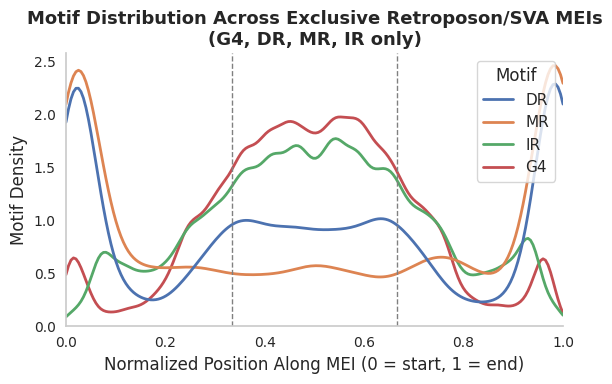

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set(style="whitegrid")

# === Step 1: Load and filter MEIs ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4_csv = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# Extract Sample info and standardize
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4_csv["Sample"] = df_g4_csv["Sample"].str.split(r"_").str[0]
df_g4_csv["Motif Type"] = "G4"
df_g4_csv["identifier"] = df_g4_csv["Adjusted_Identifier"]  # maybe change to just "identifier" to test

# Keep relevant columns and combine
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4_csv[["identifier", "Motif Type", "Sample", "te_designation"]]
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]
df["chrom"] = df["identifier"].str.extract(r"^(chr[0-9XYM]+)_")[0]
print(df.shape)

# === Step 2: Identify MEIs with only G4, DR, MR, IR ===
desired_motifs = sorted(["G4", "DR", "MR", "IR"])

combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("te_designation", "first"),
        chrom=("chrom", "first")
    )
    .reset_index()
)

combo_df["Motif_Combo"] = combo_df["Motif_Set"].apply(lambda x: ",".join(x))
filtered = combo_df[
    (combo_df["TE_Class"] == "Retroposon/SVA") &
    (combo_df["Motif_Set"].apply(lambda x: sorted(x) == desired_motifs))
]

print(f"✅ Total MEIs with exactly G4, DR, MR, IR and Retroposon/SVA: {len(filtered)}")
print("Example filtered MEIs:\n", filtered["identifier"].head())

# === Step 3: Adjust MEI identifiers (+1 to length)
def adjust_mei_id(identifier):
    parts = identifier.split("_")
    parts[2] = str(int(parts[2]) + 1)
    return "_".join(parts)

valid_ids = set(filtered["identifier"].apply(adjust_mei_id))
valid_g4_ids = set(filtered["identifier"])  # do not +1

# === Step 4: Collect motif positions from BEDs and G4 CSV
base_dir = "/home/alextu/scratch/annotated_MEIs_nbmst_collapsed"
motif_types = ["DR", "MR", "IR"]
records = set()
final_data = []

def extract_mei_length(identifier):
    try:
        return int(identifier.split("_")[2])
    except:
        return None

# --- Add motifs from BEDs (DR, MR, IR)
for motif in motif_types:
    bed_files = glob(f"{base_dir}/*/{motif}.collapsed.bed")
    seen_meis = set()
    total_this_motif = 0

    for bed_file in bed_files:
        try:
            df_bed = pd.read_csv(bed_file, sep="\t", header=None, names=["MEI_ID", "Start", "End"])
        except Exception:
            continue

        df_bed = df_bed[df_bed["MEI_ID"].isin(valid_ids)]
        if df_bed.empty:
            continue

        for mei_id in df_bed["MEI_ID"].unique():
            if mei_id in seen_meis:
                continue

            mei_len = extract_mei_length(mei_id)
            if mei_len is None or mei_len == 0:
                continue

            df_mei = df_bed[df_bed["MEI_ID"] == mei_id]
            for _, row in df_mei.iterrows():
                midpoint = (row["Start"] + row["End"]) / 2
                rel_pos = midpoint / mei_len
                key = (mei_id, row["Start"], row["End"], motif)
                if key not in records:
                    records.add(key)
                    final_data.append({"RelativePosition": rel_pos, "Motif": motif})
                    total_this_motif += 1

            seen_meis.add(mei_id)
    
    print(f"✅ Collected {total_this_motif} {motif} motifs")

# --- Add G4 motifs from CSV
df_g4_csv = df_g4_csv[df_g4_csv["identifier"].isin(valid_g4_ids)]
print(f"✅ G4 motifs after identifier filter: {len(df_g4_csv)}")
print("G4 identifiers (first 5):", df_g4_csv["identifier"].unique()[:5])

total_g4 = 0
for _, row in df_g4_csv.iterrows():
    mei_id = row["identifier"]
    pos = row["POS"]
    mei_len = extract_mei_length(mei_id)
    if mei_len is None or mei_len == 0:
        continue

    rel_pos = pos / mei_len
    key = (mei_id, pos, pos, "G4")
    if key not in records:
        records.add(key)
        final_data.append({"RelativePosition": rel_pos, "Motif": "G4"})
        total_g4 += 1

print(f"✅ Collected {total_g4} G4 motifs")

# === Step 5: Plot KDE
df_plot = pd.DataFrame(final_data)
print("✅ Motif counts in final plot:")
print(df_plot["Motif"].value_counts())

plt.figure(figsize=(6, 4))
ax = sns.kdeplot(
    data=df_plot,
    x="RelativePosition",
    hue="Motif",
    fill=False,
    common_norm=False,
    bw_adjust=0.5,
    clip=(0, 1),
    alpha=1,
    linewidth=2
)

ax.set_xlim(0, 1)
ax.set_xlabel("Normalized Position Along MEI (0 = start, 1 = end)", fontsize=12)
ax.set_ylabel("Motif Density", fontsize=12)
ax.set_title("Motif Distribution Across Exclusive Retroposon/SVA MEIs\n(G4, DR, MR, IR only)", fontsize=13, weight="bold")

sns.despine()
ax.grid(False)
ax.tick_params(length=4, width=1, labelsize=10)
plt.axvline(1/3, linestyle="--", color="gray", lw=1)
plt.axvline(2/3, linestyle="--", color="gray", lw=1)

plt.tight_layout()
plt.show()

(260653, 5)
✅ Total MEIs with exactly G4, DR, MR, IR and Retroposon/SVA: 594
Example filtered MEIs:
 19     chr10_105442765_328_INS
24     chr10_106297552_879_INS
25    chr10_106410038_1429_INS
32    chr10_107741459_1111_INS
34    chr10_108078468_2137_INS
Name: identifier, dtype: object
✅ Collected 737 DR motifs
✅ Collected 670 MR motifs
✅ Collected 1666 IR motifs
✅ G4 motifs after identifier filter: 5103
G4 identifiers (first 5): ['chr10_109582447_841_INS' 'chr10_126939106_801_INS'
 'chr10_29454891_569_INS' 'chr11_48903169_350_INS'
 'chr12_101740149_1510_INS']
✅ Collected 599 G4 motifs
✅ Motif counts in final plot:
Motif
IR    1666
DR     737
MR     670
G4     599
Name: count, dtype: int64


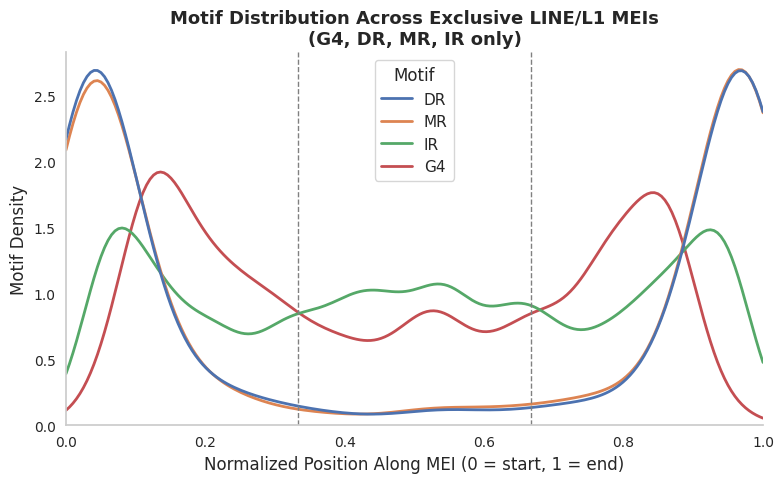

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set(style="whitegrid")

# === Step 1: Load and filter MEIs ===
df_nonb = pd.read_csv("/home/alextu/scratch/mei_analysis/MEIannotations_summary_metrics_chr_with_TE_designations.csv")
df_g4_csv = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# Extract Sample info and standardize
df_nonb["Sample"] = df_nonb["Sample_Haplotype_Chromosome"].str.split(r"\|").str[0]
df_g4_csv["Sample"] = df_g4_csv["Sample"].str.split(r"_").str[0]
df_g4_csv["Motif Type"] = "G4"
df_g4_csv["identifier"] = df_g4_csv["Adjusted_Identifier"]  # maybe change to just "identifier" to test

# Keep relevant columns and combine
df_nonb = df_nonb[["identifier", "Motif Type", "Sample", "te_designation"]]
df_g4 = df_g4_csv[["identifier", "Motif Type", "Sample", "te_designation"]]
df = pd.concat([df_nonb, df_g4], ignore_index=True).drop_duplicates()
df = df[df["te_designation"] != "snRNA"]
df["chrom"] = df["identifier"].str.extract(r"^(chr[0-9XYM]+)_")[0]
print(df.shape)

# === Step 2: Identify MEIs with only G4, DR, MR, IR ===
desired_motifs = sorted(["G4", "DR", "MR", "IR"])

combo_df = (
    df.groupby("identifier")
    .agg(
        Motif_Set=("Motif Type", lambda x: sorted(set(x))),
        TE_Class=("te_designation", "first"),
        chrom=("chrom", "first")
    )
    .reset_index()
)

combo_df["Motif_Combo"] = combo_df["Motif_Set"].apply(lambda x: ",".join(x))
filtered = combo_df[
    (combo_df["TE_Class"] == "LINE/L1") &
    (combo_df["Motif_Set"].apply(lambda x: sorted(x) == desired_motifs))
]

print(f"✅ Total MEIs with exactly G4, DR, MR, IR and Retroposon/SVA: {len(filtered)}")
print("Example filtered MEIs:\n", filtered["identifier"].head())

# === Step 3: Adjust MEI identifiers (+1 to length)
def adjust_mei_id(identifier):
    parts = identifier.split("_")
    parts[2] = str(int(parts[2]) + 1)
    return "_".join(parts)

valid_ids = set(filtered["identifier"].apply(adjust_mei_id))
valid_g4_ids = set(filtered["identifier"])  # do not +1

# === Step 4: Collect motif positions from BEDs and G4 CSV
base_dir = "/home/alextu/scratch/annotated_MEIs_nbmst_collapsed"
motif_types = ["DR", "MR", "IR"]
records = set()
final_data = []

def extract_mei_length(identifier):
    try:
        return int(identifier.split("_")[2])
    except:
        return None

# --- Add motifs from BEDs (DR, MR, IR)
for motif in motif_types:
    bed_files = glob(f"{base_dir}/*/{motif}.collapsed.bed")
    seen_meis = set()
    total_this_motif = 0

    for bed_file in bed_files:
        try:
            df_bed = pd.read_csv(bed_file, sep="\t", header=None, names=["MEI_ID", "Start", "End"])
        except Exception:
            continue

        df_bed = df_bed[df_bed["MEI_ID"].isin(valid_ids)]
        if df_bed.empty:
            continue

        for mei_id in df_bed["MEI_ID"].unique():
            if mei_id in seen_meis:
                continue

            mei_len = extract_mei_length(mei_id)
            if mei_len is None or mei_len == 0:
                continue

            df_mei = df_bed[df_bed["MEI_ID"] == mei_id]
            for _, row in df_mei.iterrows():
                midpoint = (row["Start"] + row["End"]) / 2
                rel_pos = midpoint / mei_len
                key = (mei_id, row["Start"], row["End"], motif)
                if key not in records:
                    records.add(key)
                    final_data.append({"RelativePosition": rel_pos, "Motif": motif})
                    total_this_motif += 1

            seen_meis.add(mei_id)
    
    print(f"✅ Collected {total_this_motif} {motif} motifs")

# --- Add G4 motifs from CSV
df_g4_csv = df_g4_csv[df_g4_csv["identifier"].isin(valid_g4_ids)]
print(f"✅ G4 motifs after identifier filter: {len(df_g4_csv)}")
print("G4 identifiers (first 5):", df_g4_csv["identifier"].unique()[:5])

total_g4 = 0
for _, row in df_g4_csv.iterrows():
    mei_id = row["identifier"]
    pos = row["POS"]
    mei_len = extract_mei_length(mei_id)
    if mei_len is None or mei_len == 0:
        continue

    rel_pos = pos / mei_len
    key = (mei_id, pos, pos, "G4")
    if key not in records:
        records.add(key)
        final_data.append({"RelativePosition": rel_pos, "Motif": "G4"})
        total_g4 += 1

print(f"✅ Collected {total_g4} G4 motifs")

# === Step 5: Plot KDE
df_plot = pd.DataFrame(final_data)
print("✅ Motif counts in final plot:")
print(df_plot["Motif"].value_counts())

plt.figure(figsize=(8, 5))
ax = sns.kdeplot(
    data=df_plot,
    x="RelativePosition",
    hue="Motif",
    fill=False,
    common_norm=False,
    bw_adjust=0.5,
    clip=(0, 1),
    alpha=1,
    linewidth=2
)

ax.set_xlim(0, 1)
ax.set_xlabel("Normalized Position Along MEI (0 = start, 1 = end)", fontsize=12)
ax.set_ylabel("Motif Density", fontsize=12)
ax.set_title("Motif Distribution Across Exclusive LINE/L1 MEIs\n(G4, DR, MR, IR only)", fontsize=13, weight="bold")

sns.despine()
ax.grid(False)
ax.tick_params(length=4, width=1, labelsize=10)
plt.axvline(1/3, linestyle="--", color="gray", lw=1)
plt.axvline(2/3, linestyle="--", color="gray", lw=1)

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests
from itertools import combinations

# Optional: If you have statannotations
try:
    from statannotations.Annotator import Annotator
    USE_STATANNOT = True
except ImportError:
    USE_STATANNOT = False

# === Load data
df = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")
df['Q'] = pd.to_numeric(df['Q'], errors='coerce')
df = df.dropna(subset=["Q", "te_designation", "l1me_aid_info"])
df = df[df["te_designation"] == "SINE/Alu"]  # Focus on SINE/Alu

# === Extract RM_Annotation
df["RM_Annotation"] = df["l1me_aid_info"].str.extract(r"RM_Annotation:([^;]+)")
print("RM annotations found:", df["RM_Annotation"].unique())
print("Number of pairwise comparisons:", len(pairs))

# === Order RM annotations by median Q
ordered_rms = df.groupby("RM_Annotation")["Q"].median().sort_values(ascending=False).index.tolist()
df["RM_Annotation"] = pd.Categorical(df["RM_Annotation"], categories=ordered_rms, ordered=True)

# === Pairwise Wilcoxon p-values
rm_levels = df["RM_Annotation"].cat.categories
pairs = list(combinations(rm_levels, 2))
pvals = []
for g1, g2 in pairs:
    q1 = df[df["RM_Annotation"] == g1]["Q"]
    q2 = df[df["RM_Annotation"] == g2]["Q"]
    stat, p = ranksums(q1, q2)
    pvals.append(p)

adjusted = multipletests(pvals, method="fdr_bh")[1]
pval_dict = {pair: p for pair, p in zip(pairs, adjusted)}

# === Plot
plt.figure(figsize=(max(6, len(ordered_rms)*0.6), 6))
sns.set(style="whitegrid")

ax = sns.boxplot(
    data=df,
    x="RM_Annotation",
    y="Q",
    color="lightblue",
    showfliers=False
)

plt.xlabel("RM Annotation")
plt.ylabel("G4 Stability (Q)")
plt.title("G4 Stability Across LINE/L1 RM_Annotations")
plt.xticks(rotation=45, ha="right")

# === Annotate p-values
if USE_STATANNOT:
    annotator = Annotator(ax, pairs, data=df, x="RM_Annotation", y="Q")
    annotator.set_pvalues_and_annotate(list(pval_dict.values()), correction_format="star")
else:
    y_max = df["Q"].max()
    h = (y_max - df["Q"].min()) * 0.04
    for i, ((g1, g2), p) in enumerate(pval_dict.items()):
        try:
            x1 = ordered_rms.index(g1)
            x2 = ordered_rms.index(g2)
        except ValueError:
            continue
        y = y_max + i * h
        bar_x = [x1, x1, x2, x2]
        bar_y = [y, y + h / 2, y + h / 2, y]
        plt.plot(bar_x, bar_y, c="black")
        star = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"
        plt.text((x1 + x2) / 2, y + h * 1.1, star, ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

RM annotations found: ['AluYa5']


NameError: name 'pairs' is not defined

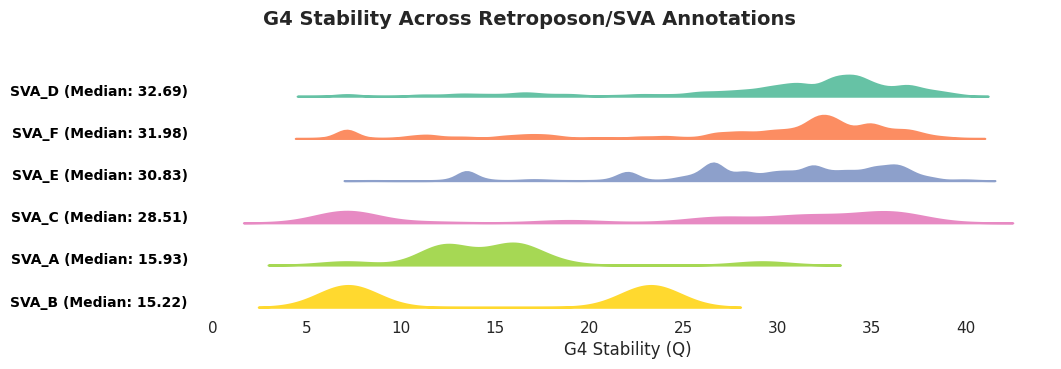

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Load and preprocess data
df = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")
df['Q'] = pd.to_numeric(df['Q'], errors='coerce')
df = df.dropna(subset=["Q", "te_designation", "l1me_aid_info"])
df = df[df["te_designation"] == "Retroposon/SVA"]

# === Extract RM_Annotation
df["RM_Annotation"] = df["l1me_aid_info"].str.extract(r"RM_Annotation:([^;]+)")

# === Order RM annotations by median Q
medians = df.groupby("RM_Annotation")["Q"].median().sort_values(ascending=False)
ordered_rms = medians.index.tolist()
df["RM_Annotation"] = pd.Categorical(df["RM_Annotation"], categories=ordered_rms, ordered=True)

# === Ridge plot setup
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(
    df,
    row="RM_Annotation",
    hue="RM_Annotation",
    aspect=18,     # Wider (was 5)
    height=0.6,   # Shorter height per ridge
    palette="Set2",
    row_order=ordered_rms
)

g.map(sns.kdeplot, "Q",
      bw_adjust=0.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

# === Add annotation labels and medians
for ax, label in zip(g.axes.flat, ordered_rms):
    median_q = medians[label]
    ax.text(-0.02, 0.2, f"{label} (Median: {median_q:.2f})",
            fontweight="bold",
            fontsize=10,
            color="black",
            ha="right",
            va="center",
            transform=ax.transAxes)

# === Final formatting
g.figure.subplots_adjust(hspace=-0.7)
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="G4 Stability (Q)")
g.despine(bottom=True, left=True)

plt.suptitle("G4 Stability Across Retroposon/SVA Annotations", fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig('G4_stability_SVA_age.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
import pandas as pd

# Load data
df = pd.read_csv("/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv")

# Extract RM_Annotation from l1me_aid_info
df = df.dropna(subset=["l1me_aid_info"])
df["RM_Annotation"] = df["l1me_aid_info"].str.extract(r"RM_Annotation:([^;]+)")

# Count occurrences and print
rm_counts = df["RM_Annotation"].value_counts().sort_values(ascending=False)

print("RM_Annotation counts:")
for annotation, count in rm_counts.items():
    print(f"{annotation}: {count}")

RM_Annotation counts:
SVA_F: 43530
SVA_E: 18244
L1HS: 12115
SVA_D: 7160
L1PA2: 1413
SVA_C: 576
SVA_B: 177
AluYa5: 20
SVA_A: 16


In [6]:
import pandas as pd

# === Load the dataset
file_path = "/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_sequences_with_TE_designations.csv"
df = pd.read_csv(file_path)

# === Focus only on SINE/Alu elements
df_alu = df[df["te_designation"] == "SINE/Alu"].copy()

# === Extract RM Annotation (Alu subfamily)
df_alu["RM_Annotation"] = df_alu["l1me_aid_info"].str.extract(r"RM_Annotation:([^;]+)")

# === (1) Count of all Alu RM_Annotations in the full MEI set
print("\nAll Alu RM_Annotations (in MEI dataset):")
all_counts = df_alu["RM_Annotation"].value_counts()
print(all_counts)

# === (2) Count of Alu RM_Annotations that contain G4s (i.e. have a valid Q value)
df_alu_g4 = df_alu[df_alu["Q"].notna()]
print("\nAlu RM_Annotations WITH G4s:")
g4_counts = df_alu_g4["RM_Annotation"].value_counts()
print(g4_counts)

# === (Optional) Save both to CSV
summary_df = pd.DataFrame({
    "Total_MEI_Count": all_counts,
    "G4_Positive_Count": g4_counts
}).fillna(0).astype(int)

summary_df["G4_Fraction"] = (summary_df["G4_Positive_Count"] / summary_df["Total_MEI_Count"]).round(3)

summary_df.to_csv("alu_g4_counts_comparison.csv")
print("\nSaved summary to 'alu_g4_counts_comparison.csv'")


All Alu RM_Annotations (in MEI dataset):
RM_Annotation
AluYa5    20
Name: count, dtype: int64

Alu RM_Annotations WITH G4s:
RM_Annotation
AluYa5    19
Name: count, dtype: int64

Saved summary to 'alu_g4_counts_comparison.csv'
